In [19]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly, Stations

In [107]:
agulla_coords = (41.749179, 1.842008)
start = datetime(2019, 1, 1)
end = datetime(2023, 10, 1)

#  Point fetch

In [109]:
# end       if model=True could contain forecast data #Fixable? 
# method    ["weighted", "nearest"]
def get_hourly_point_data(lat, lon, start, end, alt=None, model=False, method="weighted"):
    Point.method = method
    point = Point(lat, lon, alt)
    data = Hourly(point, start, end, model=model)
    data = data.fetch()
    return data

hourly_data_agulla = get_hourly_point_data(agulla_coords[0], agulla_coords[1], start, end, alt=290, model=False, method="weighted")


In [114]:
# hourly_data_agulla.to_csv(r"C:\Users\ian.palacin\Desktop\projects\IMPETUS\data\agulla\hourly_weighted_meteostat_agulla.csv")

In [66]:
Point.method = "weighted"
parc_agulla = Point(agulla_coords[0], agulla_coords[1], 290)
data = Hourly(parc_agulla, start, end, model=True)
data = data.fetch()
data.head(1)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-01-01,4.8,3.8,93.0,0.0,NaN,280.0,7.6,NaN,1028.0,NaN,5.0


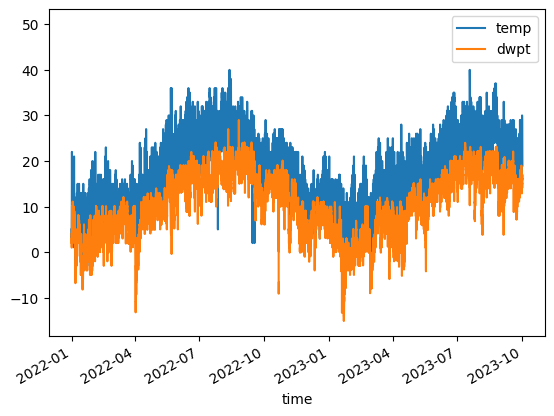

In [111]:
data.plot(y=['temp', 'dwpt'])
plt.show()

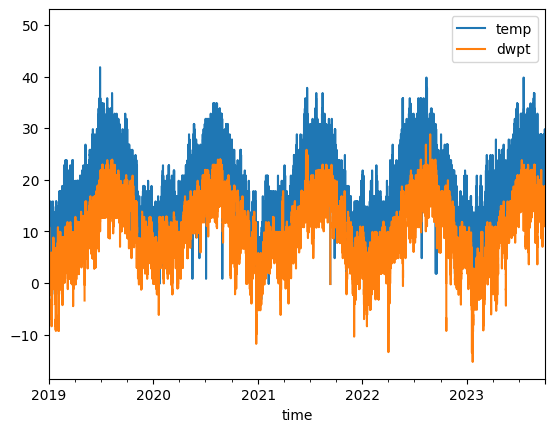

In [112]:
hourly_data_agulla.plot(y=['temp', 'dwpt'])
plt.show()

# Station fetch

In [117]:
def get_nearby_stations(lat, lon, radius, freq=None, start=None, end=None, fetch_number=10, wmo_must=False, icao_must=False):
    stations = Stations()
    stations = stations.nearby(lat, lon, radius=radius)
    if start != None:
        stations = stations.inventory(freq, (start, end))
    stations = stations.fetch(fetch_number)
    if wmo_must:
        stations = stations[ stations.wmo.notna()]
    if icao_must:
        stations = stations[ stations.icao.notna()]
    return stations
    
# end       if model=True could contain forecast data #Fixable? Fetch last time without model
# wmo       world meteorological  organisation
# icao      aeropuerto
def get_hourly_station_data(station_id, start, end, model=False):
    data = Hourly(station_id, start, end, model=model)
    data = data.fetch()
    return data



a = get_nearby_stations(agulla_coords[0], agulla_coords[1], radius=60000)
a = get_hourly_station_data("LELL0", start, end, model=False)
a

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2019-01-01 00:00:00,3.0,1.0,87.0,NaN,NaN,350.0,3.6,NaN,NaN,NaN,NaN
2019-01-01 01:00:00,2.0,0.1,87.0,NaN,NaN,280.0,5.4,NaN,NaN,NaN,NaN
2019-01-01 02:00:00,3.0,1.0,87.0,NaN,NaN,300.0,5.4,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,3.0,0.1,81.0,NaN,NaN,310.0,3.6,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,2.0,1.0,93.0,NaN,NaN,290.0,7.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 20:00:00,22.0,16.9,73.0,NaN,NaN,290.0,7.6,NaN,1023.0,NaN,NaN
2023-09-30 21:00:00,21.0,17.0,78.0,NaN,NaN,280.0,5.4,NaN,1023.0,NaN,NaN
2023-09-30 22:00:00,21.0,16.0,73.0,NaN,NaN,300.0,7.6,NaN,1023.0,NaN,NaN


In [118]:
a.to_csv(r"C:\Users\ian.palacin\Desktop\projects\IMPETUS\data\agulla\hourly_LELL0_meteostat_agulla.csv")

In [44]:
stations = Stations()
stations = stations.nearby(agulla_coords[0], agulla_coords[1], radius=60000)
stations = stations.inventory("hourly", (start, end))
stations.fetch(10)

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
LELL0,Sabadell / Bellaterra,ES,CT,<NA>,LELL,41.5167,2.1000,250.0,Europe/Madrid,2006-10-30,2023-10-14,2016-06-04,2022-04-25,2018-01-01,2022-01-01,33585.414645
08181,Barcelona / Aeropuerto,ES,CT,08181,LEBL,41.2833,2.0667,4.0,Europe/Madrid,1973-01-01,2023-10-14,1924-03-01,2023-09-27,1924-01-01,2022-01-01,55077.769654


In [71]:
data = Hourly("LELL0", start, end, model=False)
data = data.fetch()
data.head(1)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-01-01,5.0,4.0,93.0,NaN,NaN,280.0,7.6,NaN,1028.0,NaN,5.0


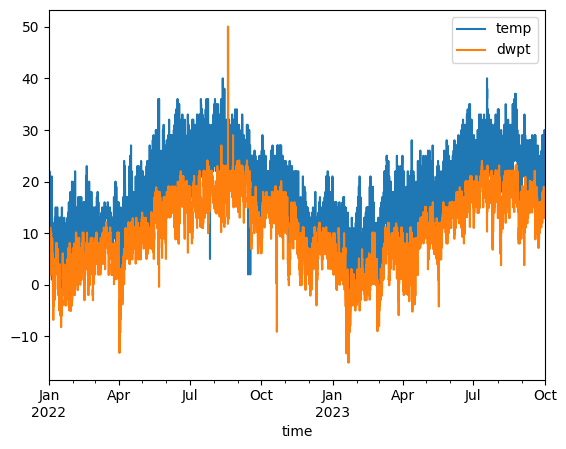

In [70]:
data.plot(y=['temp', 'dwpt'])
plt.show()